In [2]:
import numpy as np
import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.mobilenet_v2 import MobileNetV2

In [3]:
IMAGE_SHAPE = (224, 224)

In [4]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
training_data='/kaggle/input/m-dr-ds/Classification Data'
training_image_data  = image_generator.flow_from_directory(training_data,target_size=IMAGE_SHAPE)

Found 3024 images belonging to 4 classes.


In [5]:
training_image_data[1][1].shape

(32, 4)

In [6]:
validation_data='/kaggle/input/m-dr-ds/Classification Data'
validation_image_data  = image_generator.flow_from_directory(validation_data,target_size=IMAGE_SHAPE)

Found 3024 images belonging to 4 classes.


In [7]:
class_names = sorted(training_image_data.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])
class_names

array(['Mild', 'Moderate', 'Proliferate_Dr', 'Severe'], dtype='<U14')

In [8]:
conv_base = MobileNetV2(
    weights='imagenet',
    include_top = False,
    input_shape=(224,224,3)
)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
conv_base.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [10]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(4,activation='softmax'))


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ ?                      │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [12]:
conv_base.trainable = False

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ ?                      │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [14]:
for image_batch, label_batch in training_image_data:
  print("Image batch shape: ", image_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  break

Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 4)


In [15]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
history = model.fit(training_image_data, epochs = 8,
                          validation_data=validation_image_data)

Epoch 1/8


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1727721200.921889     341 service.cc:145] XLA service 0x78eea400fe10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727721200.921948     341 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1727721200.921954     341 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 1/95 ━━━━━━━━━━━━━━━━━━━━ 19:54 13s/step - accuracy: 0.2812 - loss: 1.9064

I0000 00:00:1727721206.900774     341 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


95/95 ━━━━━━━━━━━━━━━━━━━━ 50s 401ms/step - accuracy: 0.4017 - loss: 8.7748 - val_accuracy: 0.5790 - val_loss: 1.0474
Epoch 2/8
95/95 ━━━━━━━━━━━━━━━━━━━━ 24s 249ms/step - accuracy: 0.6453 - loss: 0.8930 - val_accuracy: 0.7480 - val_loss: 0.5527
Epoch 3/8
95/95 ━━━━━━━━━━━━━━━━━━━━ 23s 233ms/step - accuracy: 0.7588 - loss: 0.5960 - val_accuracy: 0.6796 - val_loss: 0.8564
Epoch 4/8
95/95 ━━━━━━━━━━━━━━━━━━━━ 23s 235ms/step - accuracy: 0.7836 - loss: 0.5625 - val_accuracy: 0.8456 - val_loss: 0.3833
Epoch 5/8
95/95 ━━━━━━━━━━━━━━━━━━━━ 24s 243ms/step - accuracy: 0.9056 - loss: 0.2667 - val_accuracy: 0.8925 - val_loss: 0.2738
Epoch 6/8
95/95 ━━━━━━━━━━━━━━━━━━━━ 40s 236ms/step - accuracy: 0.8964 - loss: 0.2986 - val_accuracy: 0.9646 - val_loss: 0.1467
Epoch 7/8
95/95 ━━━━━━━━━━━━━━━━━━━━ 23s 234ms/step - accuracy: 0.9551 - loss: 0.1546 - val_accuracy: 0.9699 - val_loss: 0.1111
Epoch 8/8
95/95 ━━━━━━━━━━━━━━━━━━━━ 23s 236ms/step - accuracy: 0.9800 - loss: 0.0934 - val_accuracy: 0.9888 - val

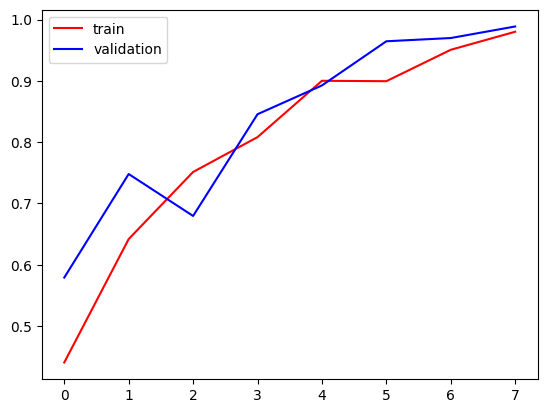

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

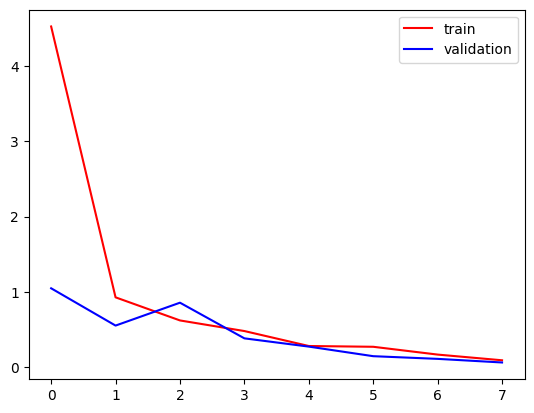

In [18]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [19]:
arr = model.predict(image_batch)
predicted_id = np.argmax(arr, axis=-1)
predicted_label_batch = class_names[predicted_id]
label_id = np.argmax(label_batch, axis=-1)
true_label_batch = class_names[label_id]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [20]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
test_data='/kaggle/input/m-dr-ds/Classification Data'
test_image_data  = image_generator.flow_from_directory(test_data,target_size=IMAGE_SHAPE, batch_size=150)

Found 3024 images belonging to 4 classes.


In [21]:
for image_batch, label_batch in test_image_data:
  print("Image batch shape: ", image_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  break

Image batch shape:  (150, 224, 224, 3)
Label batch shape:  (150, 4)


In [22]:
predicted_batch = model.predict(image_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
label_id = np.argmax(label_batch, axis=-1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step 


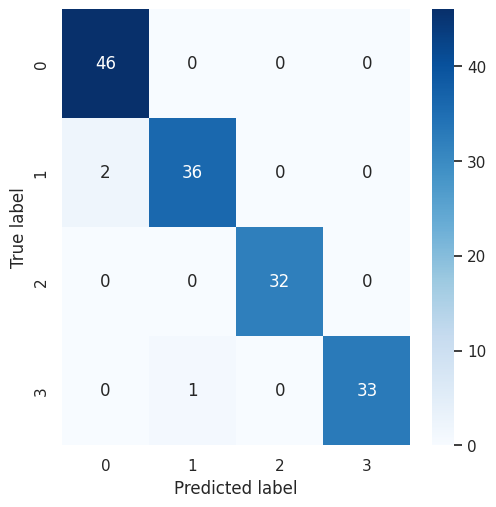

In [23]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()

con_mat_df=tf.math.confusion_matrix(
    labels = label_id , predictions = predicted_id
)

figure = plt.figure(figsize=(5, 5))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [24]:
from sklearn.metrics import classification_report
print(classification_report(label_id, predicted_id, zero_division=0))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        46
           1       0.97      0.95      0.96        38
           2       1.00      1.00      1.00        32
           3       1.00      0.97      0.99        34

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



In [25]:
model.save('M-DR-MobileNet2V.h5')
model.save('M-DR-MobileNet2V.keras')

In [ ]:
import numpy as np
import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.mobilenet_v2 import MobileNetV2

IMAGE_SHAPE = (224, 224)
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
training_data='/kaggle/input/m-dr-ds/Classification Data'
training_image_data  = image_generator.flow_from_directory(training_data,target_size=IMAGE_SHAPE)
training_image_data[1][1].shape
validation_data='/kaggle/input/m-dr-ds/Classification Data'
validation_image_data  = image_generator.flow_from_directory(validation_data,target_size=IMAGE_SHAPE)
class_names = sorted(training_image_data.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])
class_names
conv_base = MobileNetV2(
    weights='imagenet',
    include_top = False,
    input_shape=(224,224,3)
)

conv_base.summary()

model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(4,activation='softmax'))

model.summary()

conv_base.trainable = False
model.summary()
for image_batch, label_batch in training_image_data:
  print("Image batch shape: ", image_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  break

model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(training_image_data, epochs = 8,
                          validation_data=validation_image_data)

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

arr = model.predict(image_batch)
predicted_id = np.argmax(arr, axis=-1)
predicted_label_batch = class_names[predicted_id]
label_id = np.argmax(label_batch, axis=-1)
true_label_batch = class_names[label_id]

image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
test_data='/kaggle/input/m-dr-ds/Classification Data'
test_image_data  = image_generator.flow_from_directory(test_data,target_size=IMAGE_SHAPE, batch_size=150)

for image_batch, label_batch in test_image_data:
  print("Image batch shape: ", image_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  break

predicted_batch = model.predict(image_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
label_id = np.argmax(label_batch, axis=-1)

import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()

con_mat_df=tf.math.confusion_matrix(
    labels = label_id , predictions = predicted_id
)

figure = plt.figure(figsize=(5, 5))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

from sklearn.metrics import classification_report
print(classification_report(label_id, predicted_id, zero_division=0))

model.save('M-DR-MobileNet2V.h5')
model.save('M-DR-MobileNet2V.keras')

make necessary changes in the code to improve the models performance  and with the data we have just seen do not make changes with the current image paths.

only work on improving model accuract

# Made Minor Changes

In [ ]:
import numpy as np
import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.applications.mobilenet_v2 import MobileNetV2

# Image shape and data augmentation for training
IMAGE_SHAPE = (224, 224)
train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255,
    rotation_range=20,  # Rotate images
    width_shift_range=0.2,  # Shift images horizontally
    height_shift_range=0.2,  # Shift images vertically
    shear_range=0.2,  # Shear transformations
    zoom_range=0.2,  # Zoom in/out
    horizontal_flip=True,  # Flip images horizontally
    fill_mode='nearest'  # Fill any missing pixels after transformation
)

validation_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

# Training and validation data
training_data = '/kaggle/input/m-dr-ds/Classification Data'
training_image_data  = train_image_generator.flow_from_directory(training_data, target_size=IMAGE_SHAPE)
validation_data = '/kaggle/input/m-dr-ds/Classification Data'
validation_image_data  = validation_image_generator.flow_from_directory(validation_data, target_size=IMAGE_SHAPE)

class_names = sorted(training_image_data.class_indices.items(), key=lambda pair: pair[1])
class_names = np.array([key.title() for key, value in class_names])

# Load pre-trained MobileNetV2 without the top layers
conv_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create the model
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())  # Add Batch Normalization layer
model.add(Dropout(0.5))  # Add Dropout layer to prevent overfitting
model.add(Dense(4, activation='softmax'))

# Freezing the convolutional base
conv_base.trainable = False

# Compile the model with a learning rate scheduler
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.9, staircase=True
)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

# Train the model with increased epochs
history = model.fit(training_image_data, epochs=20, validation_data=validation_image_data)

# Plot accuracy
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

# Confusion Matrix and Classification Report
test_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
test_data = '/kaggle/input/m-dr-ds/Classification Data'
test_image_data = test_image_generator.flow_from_directory(test_data, target_size=IMAGE_SHAPE, batch_size=150)

for image_batch, label_batch in test_image_data:
    predicted_batch = model.predict(image_batch)
    predicted_id = np.argmax(predicted_batch, axis=-1)
    label_id = np.argmax(label_batch, axis=-1)

    # Confusion matrix
    con_mat_df = tf.math.confusion_matrix(labels=label_id, predictions=predicted_id)

    # Plot confusion matrix
    import seaborn as sns
    sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    # Classification report
    from sklearn.metrics import classification_report
    print(classification_report(label_id, predicted_id, zero_division=0))

    break

# Save the model
model.save('M-DR-MobileNet2V.h5')
model.save('M-DR-MobileNet2V.keras')


# Improved Code

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.applications.mobilenet_v2 import MobileNetV2

# Image shape and data augmentation for training
IMAGE_SHAPE = (224, 224)
train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

# Training and validation data paths
training_data = '/kaggle/input/m-dr-ds/Classification Data'
training_image_data  = train_image_generator.flow_from_directory(training_data, target_size=IMAGE_SHAPE)
validation_data = '/kaggle/input/m-dr-ds/Classification Data'
validation_image_data  = validation_image_generator.flow_from_directory(validation_data, target_size=IMAGE_SHAPE)

class_names = sorted(training_image_data.class_indices.items(), key=lambda pair: pair[1])
class_names = np.array([key.title() for key, value in class_names])

# Load pre-trained MobileNetV2 without the top layers
conv_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze the last few layers of the MobileNetV2 base for fine-tuning
conv_base.trainable = True
fine_tune_at = 100  # Choose layer to start fine-tuning
for layer in conv_base.layers[:fine_tune_at]:
    layer.trainable = False

# Create the model
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())  # Batch Normalization
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(Dense(4, activation='softmax'))

# Compile the model with a lower learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # Lower learning rate for fine-tuning
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
history = model.fit(training_image_data, epochs=20, validation_data=validation_image_data)

# Plot accuracy
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

# Confusion Matrix and Classification Report
test_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
test_data = '/kaggle/input/m-dr-ds/Classification Data'
test_image_data = test_image_generator.flow_from_directory(test_data, target_size=IMAGE_SHAPE, batch_size=150)

for image_batch, label_batch in test_image_data:
    predicted_batch = model.predict(image_batch)
    predicted_id = np.argmax(predicted_batch, axis=-1)
    label_id = np.argmax(label_batch, axis=-1)

    # Confusion matrix
    import seaborn as sns
    sns.heatmap(tf.math.confusion_matrix(label_id, predicted_id), annot=True, cmap=plt.cm.Blues)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    # Classification report
    from sklearn.metrics import classification_report
    print(classification_report(label_id, predicted_id, zero_division=0))

    break

# Save the model
model.save('M-DR-MobileNet2V-finetuned.h5')
model.save('M-DR-MobileNet2V-finetuned.keras')
